# Data Visualization

## Uniform dataset

#### Orbital Free results

Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Data

In [2]:
l=8

eng_data=np.load('data/gd_data/eng_270623_uniform_number_istances_100_n_ensamble_1_different_initial_epochs_2999_lr_1.npz')

eng_min=eng_data['min_energy']
eng_gs=eng_data['gs_energy']

m_data=np.load('data/gd_data/density_270623_uniform_number_istances_100_n_ensamble_1_different_initial_epochs_2999_lr_1.npz')

m_min=m_data['min_density']
m_gs=m_data['gs_density']



Results

-1.2826519195442931 -1.281791940131504


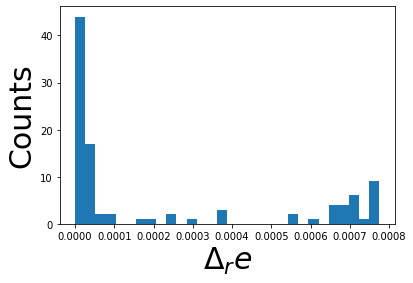

In [10]:
de=np.abs((eng_min-(eng_gs/l))/(eng_gs/l))
print(eng_min[0],eng_gs[0]/l)

plt.hist(de,bins=30)
plt.xlabel(r'$\Delta_r e$',fontsize=30)
plt.ylabel(r'Counts',fontsize=30)
plt.show()

### Kohm Sham method

Imports

In [13]:
import numpy as np
import matplotlib.pyplot as plt

Data

In [10]:
data=np.load('data/kohm_sham_approach/results/kohm_sham_uniform_0.0_2.0_ndata_50_iteration_2000_intermediate_step_1.npz')


eng=data['energy']
dx=data['dx']
dz=data['dz']
gradient=data['gradient']

Visualization

Gradients

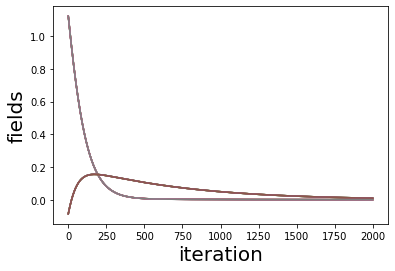

In [11]:
for i in range(1):
    plt.xlabel('iteration',fontsize=20)
    plt.ylabel('fields',fontsize=20)
    plt.plot(gradient[i,:,0,:])
    plt.plot(gradient[i,:,1,:])
    plt.show()

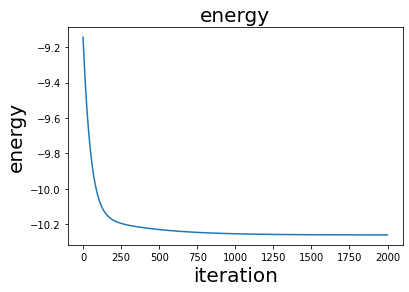

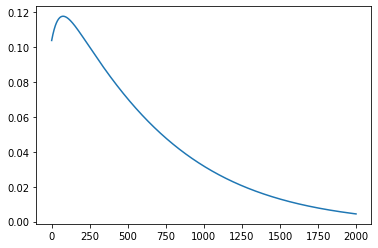

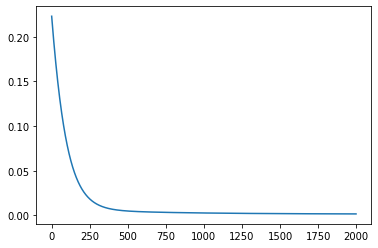

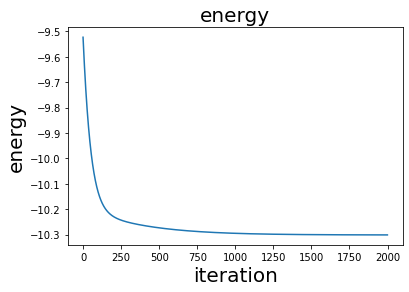

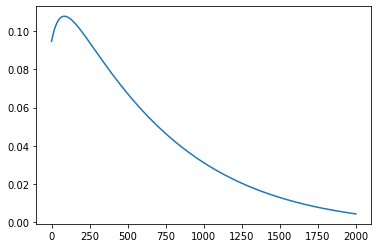

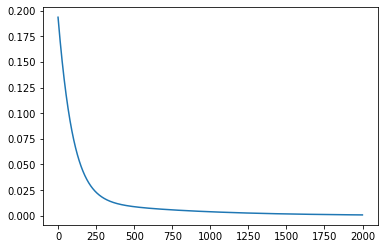

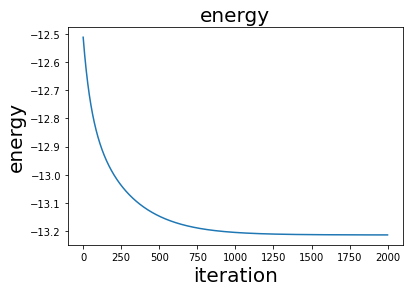

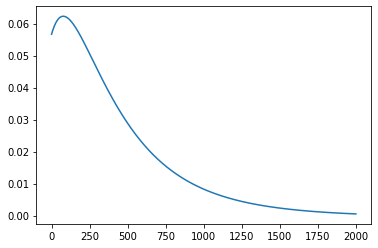

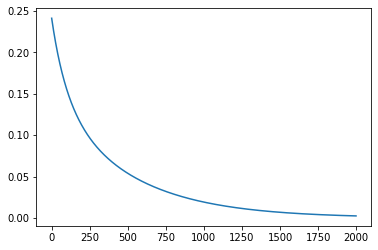

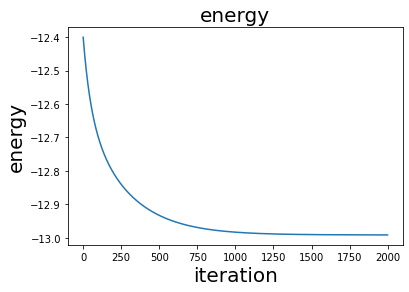

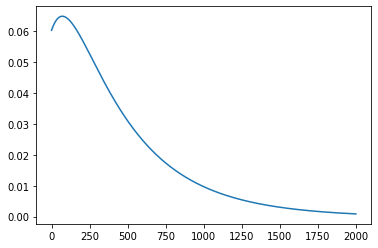

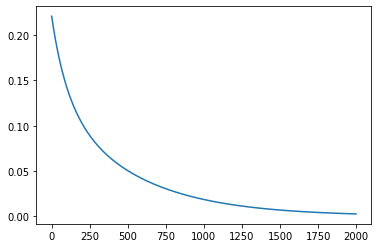

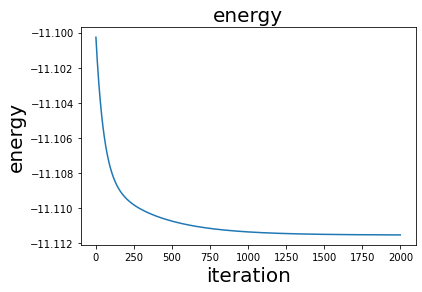

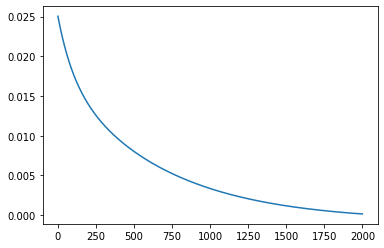

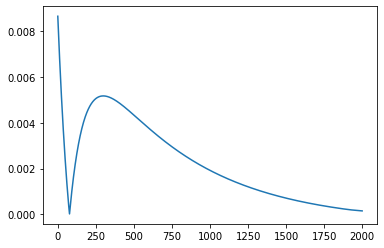

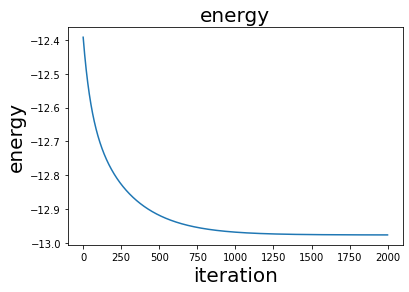

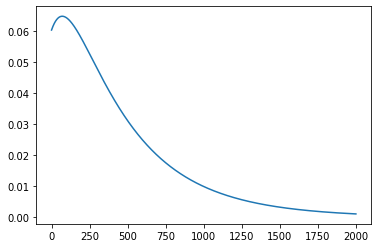

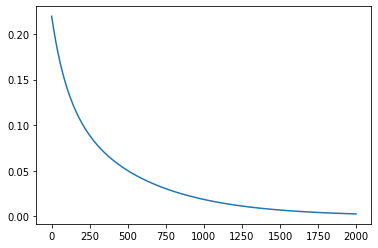

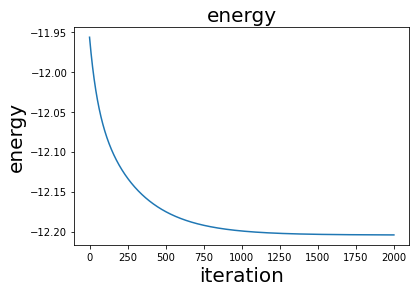

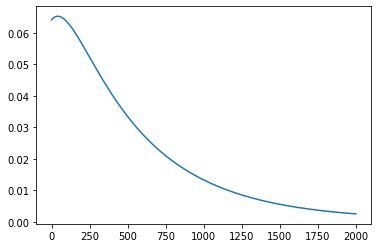

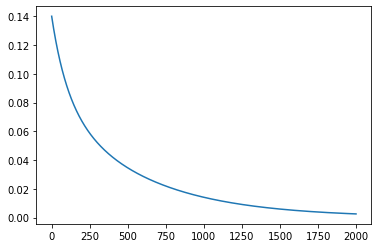

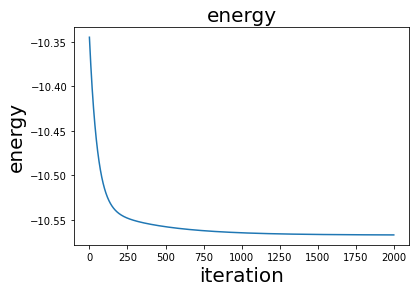

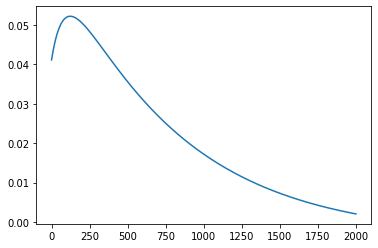

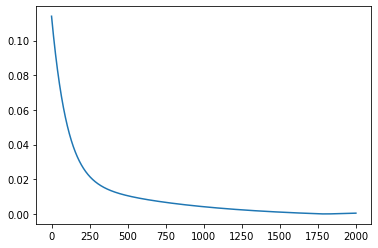

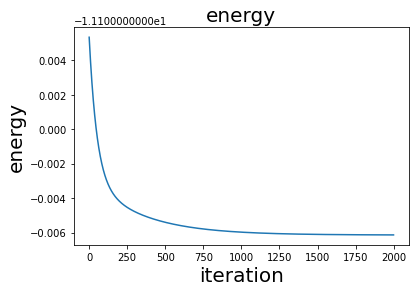

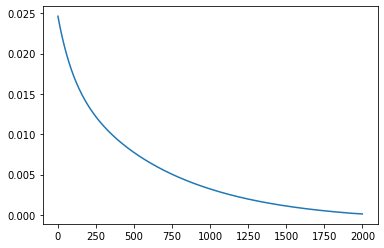

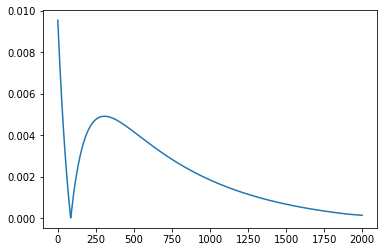

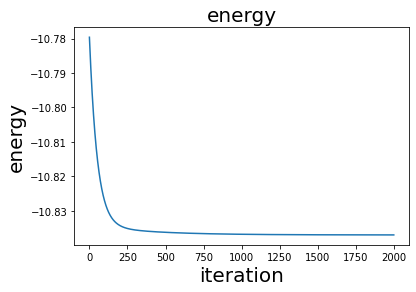

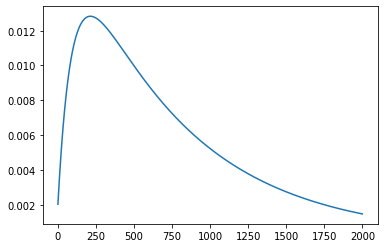

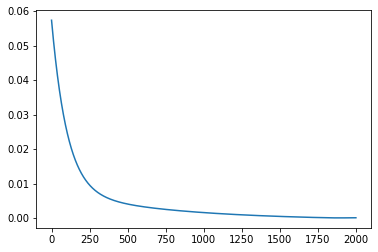

In [12]:
for i in range(10):
    plt.title('energy',fontsize=20)
    plt.xlabel('iteration',fontsize=20)
    plt.ylabel('energy',fontsize=20)
    plt.plot(eng[i])
    plt.show()
    plt.plot(dx[i])
    plt.show()
    plt.plot(dz[i])
    plt.show()

### Time Dependent Results

Imports

In [12]:
import matplotlib.pyplot as plt
import numpy as np

Data

In [15]:
data=np.load('data/kohm_sham_approach/results/tddft_adiabatic_approximation_uniform_0.0_2.0_steps_1000_self_consistent_steps_1_ndata_10_rate_0.2_exp_True.npz')

h=data['potential']
engx=data['energy_x']
engz=data['energy_z']
eng=data['energy']
eng_qutip=data['energy_qutip']

z=data['z']
x=data['x']
z_qutip=data['z_qutip']
x_qutip=data['x_qutip']
grad=data['gradient']
time=np.linspace(0,10,x.shape[1])

The driving

(10, 1000, 2, 8)


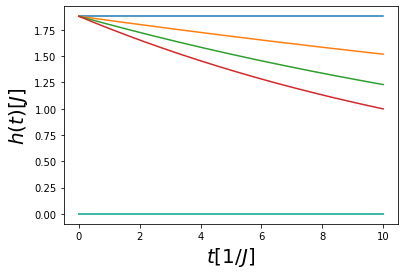

(10, 1000, 2, 8)


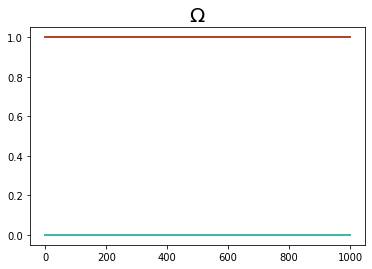

In [16]:
print(h.shape)

for r in range(10):
    plt.plot(time,h[r,:,0,0])
plt.xlabel(r'$t [1/J]$',fontsize=20)
plt.ylabel(r'$h(t) [J]$',fontsize=20)
plt.show()
print(h.shape)

plt.title(r'$\Omega$',fontsize=20)
for r in range(10):
    plt.plot(h[r,:,1,0])
plt.show()

The gradients

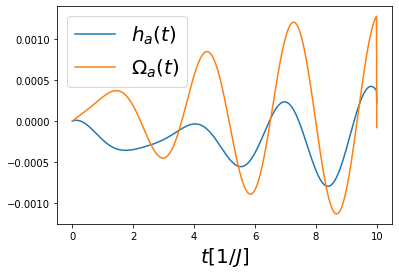

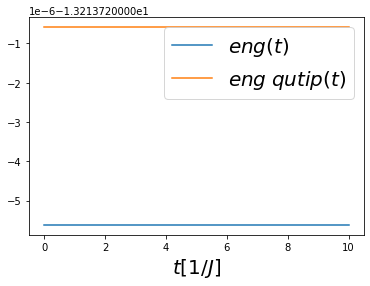

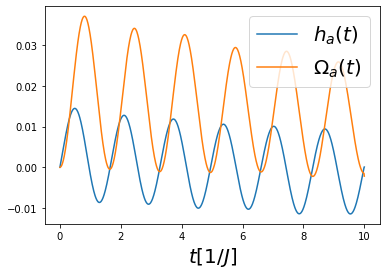

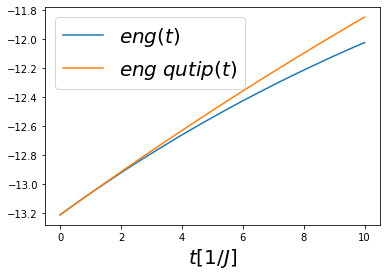

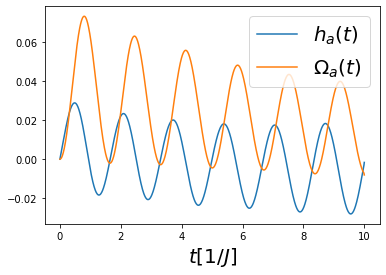

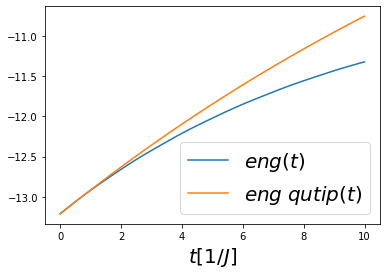

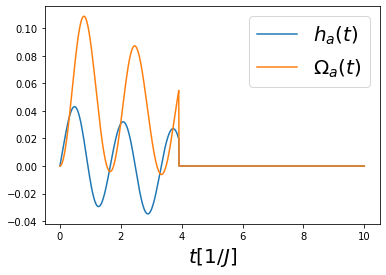

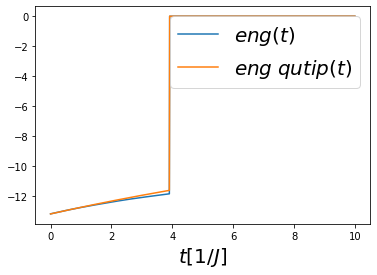

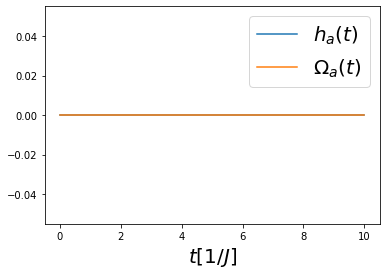

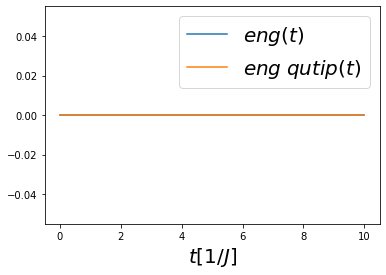

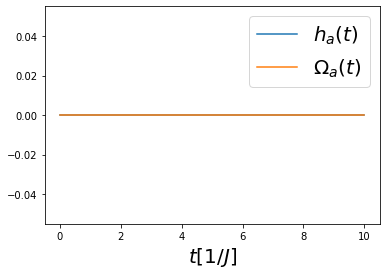

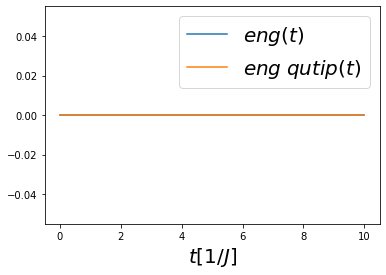

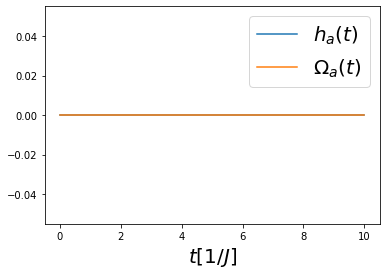

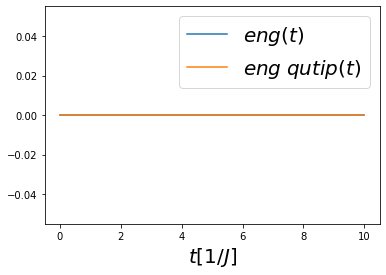

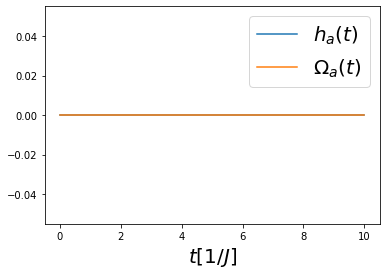

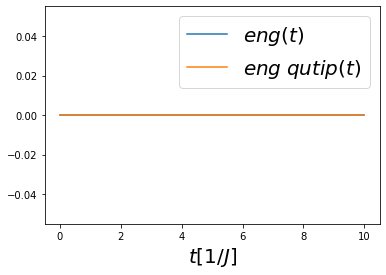

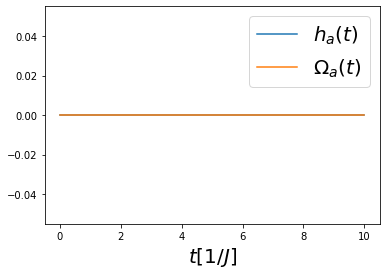

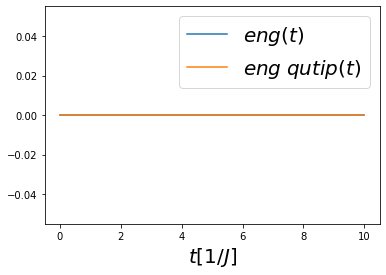

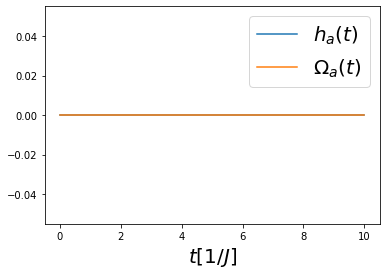

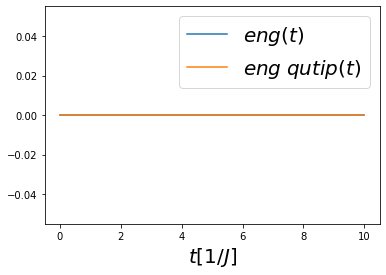

In [17]:
for i in range(10):
    plt.plot(time,grad[i,:,0,0],label=r'$h_a(t)$')
    plt.plot(time,grad[i,:,1,0],label=r'$\Omega_a(t)$')
    plt.xlabel(r'$t[1/J]$',fontsize=20)
    #plt.plot(h[i,:,0,0],label=r'$h(t)$')
    plt.legend(fontsize=20)
    plt.show()
    
    
    plt.plot(time,eng[i],label=r'$eng(t)$')
    plt.plot(time,eng_qutip[i],label=r'$eng \; qutip(t)$')
    #plt.plot(time,engz[i],label=r'$eng(t)$')
    plt.xlabel(r'$t[1/J]$',fontsize=20)
    #plt.plot(h[i,:,0,0],label=r'$h(t)$')
    plt.legend(fontsize=20)
    plt.show()
    
    

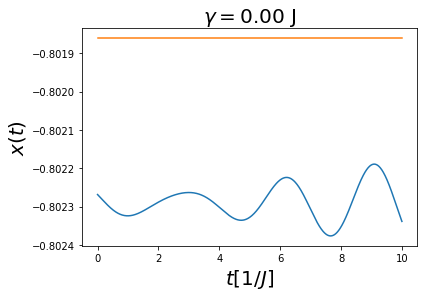

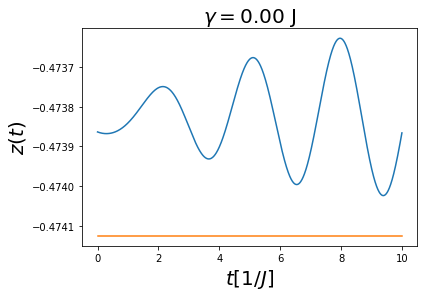

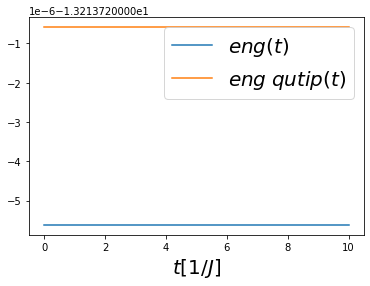

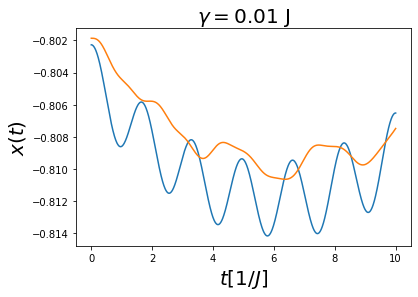

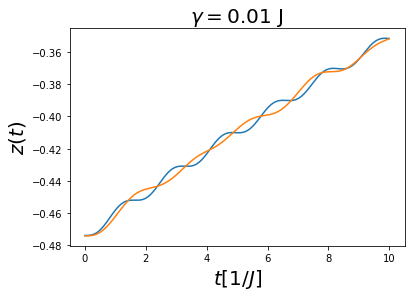

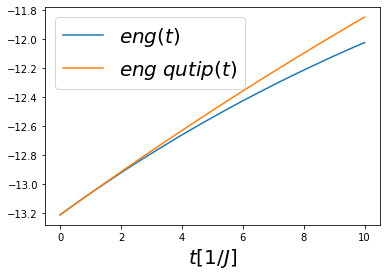

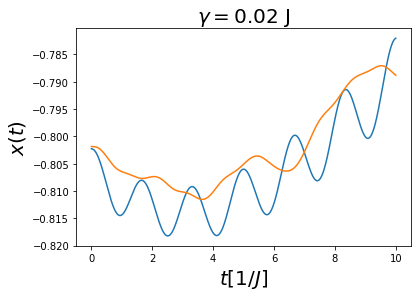

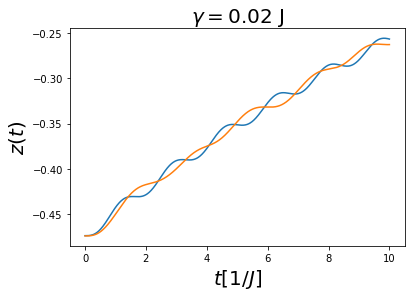

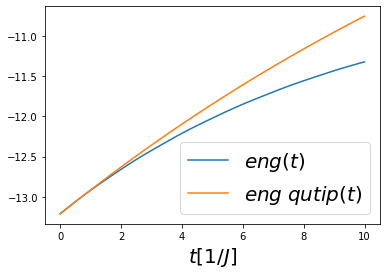

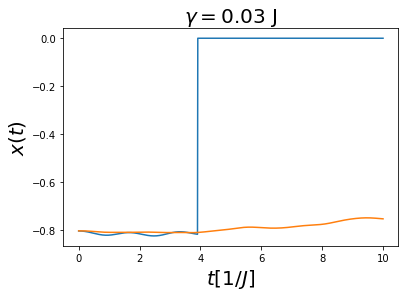

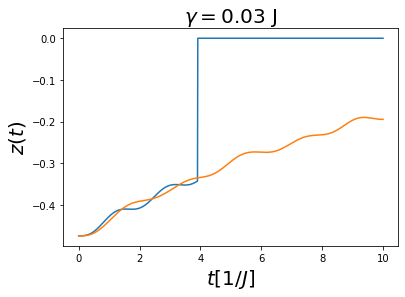

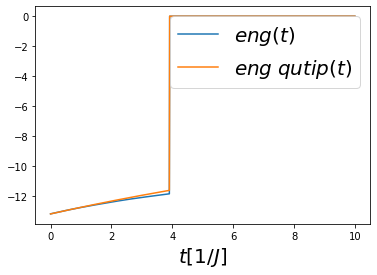

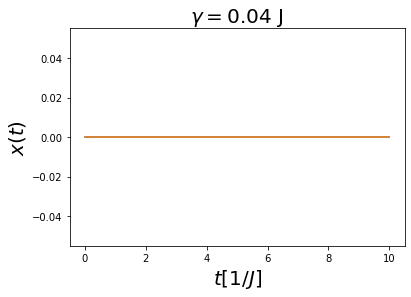

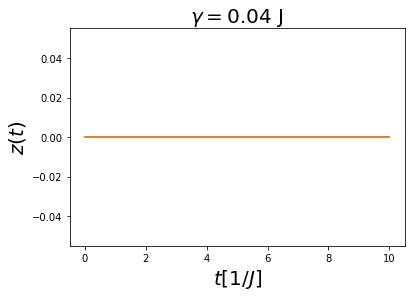

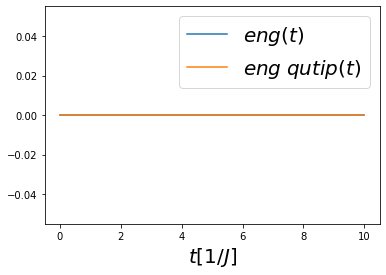

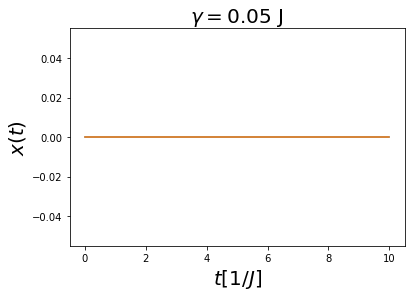

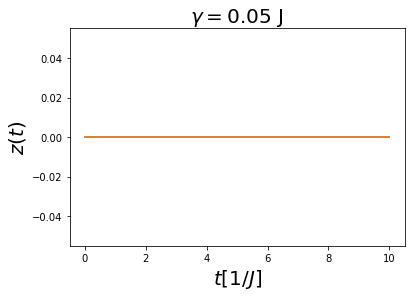

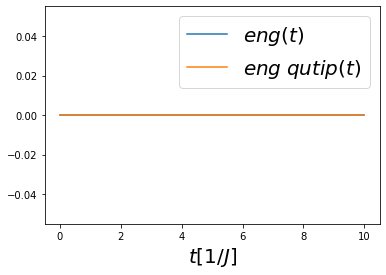

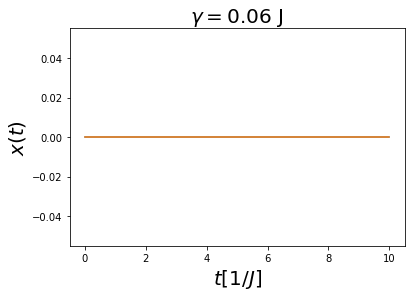

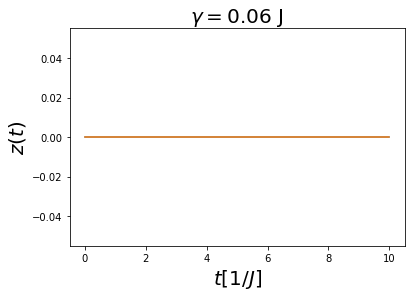

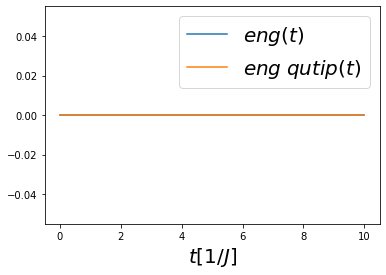

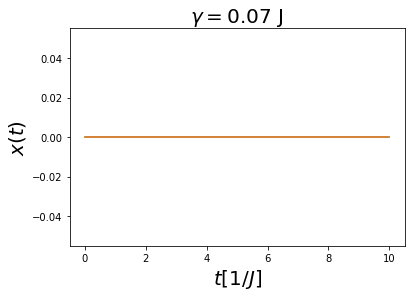

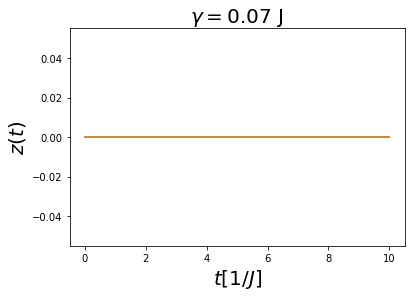

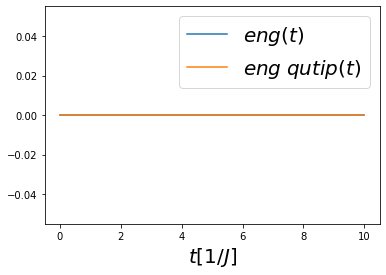

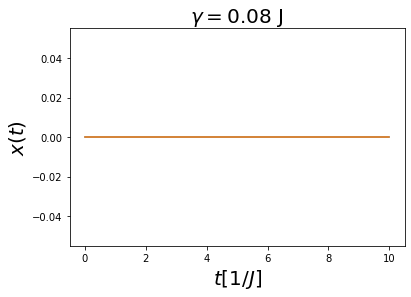

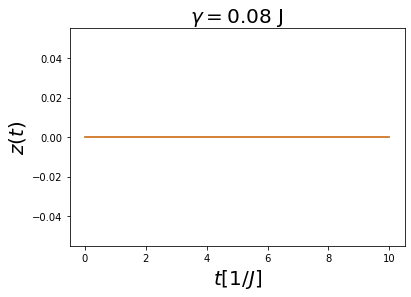

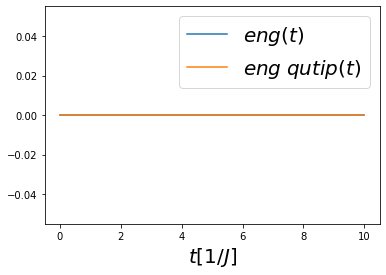

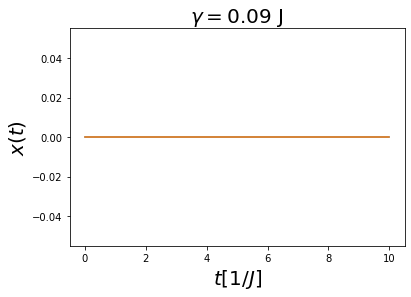

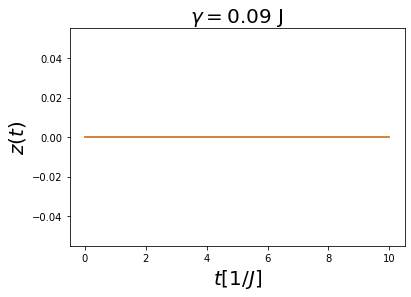

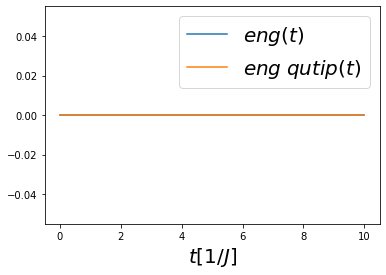

In [18]:
for i in range(10):
    r=0.01*i
    plt.title(r'$\gamma=$'+f'{r:.2f} J',fontsize=20)
    plt.plot(time,x[i,:,0])
    plt.plot(time,x_qutip[i,:,0])
    plt.xlabel(r'$t[1/J]$',fontsize=20)
    plt.ylabel(r'$x(t)$',fontsize=20)
    plt.show()
    
    plt.title(r'$\gamma=$'+f'{r:.2f} J',fontsize=20)
    plt.plot(time,z[i,:,0])
    plt.plot(time,z_qutip[i,:,0])
    plt.xlabel(r'$t[1/J]$',fontsize=20)
    plt.ylabel(r'$z(t)$',fontsize=20)
    plt.show()
    
        
    plt.plot(time,eng[i],label=r'$eng(t)$')
    plt.plot(time,eng_qutip[i],label=r'$eng \; qutip(t)$')
    #plt.plot(time,engz[i],label=r'$eng(t)$')
    plt.xlabel(r'$t[1/J]$',fontsize=20)
    #plt.plot(h[i,:,0,0],label=r'$h(t)$')
    plt.legend(fontsize=20)
    plt.show()

Energy analysis

In [ ]:
print(eng.shape)

plt.plot(eng[0,:200])
plt.show()

Measures

In [ ]:
dz=np.average(np.abs(z-z_qutip),axis=-1)#/np.average(np.abs(z_qutip),axis=(-1,-2))[:,None]

dx=np.average(np.abs(x-x_qutip),axis=-1)/np.average(np.abs(x_qutip),axis=-1)

print(dx.shape)

for i in range(dx.shape[0]):
    plt.plot(time,dx[i])
    plt.xlabel(r'$t[1/J]$',fontsize=20)
    plt.ylabel(r'$\Delta_r x$',fontsize=20)
    plt.title(r'$\gamma=$'+f'{i*0.1:.1f}',fontsize=20)
    plt.show()
    
for i in range(dx.shape[0]):
    plt.plot(time,dz[i])
    plt.xlabel(r'$t[1/J]$',fontsize=20)
    plt.ylabel(r'$\Delta z$',fontsize=20)
    plt.title(r'$\gamma=$'+f'{i*0.1:.1f}',fontsize=20)
    plt.show()

Average time error vs $\gamma$

In [ ]:
dz=np.average(np.abs(z-z_qutip),axis=(-1,-2))#/np.average(np.abs(z_qutip),axis=(-1,-2))

dx=np.average(np.abs(x-x_qutip),axis=(-1,-2))/np.average(np.abs(x_qutip),axis=(-1,-2))

rate=np.linspace(0,0.1,10)

plt.plot(rate[1:],dz[1:])
plt.xlabel(r'$\gamma [J]$',fontsize=20)
plt.ylabel(r'$\Delta z$',fontsize=20)
plt.loglog()
plt.show()

plt.plot(rate,dx)
plt.xlabel(r'$\gamma [J]$',fontsize=20)
plt.ylabel(r'$\Delta_r x$',fontsize=20)
plt.loglog()
plt.show()

#### Comparison with The number of regularization iterations

In [65]:
iteration=[10,50,100]

z={}
x={}
z_qutip={}
x_qutip={}
h={}
for it in iteration:
    data=np.load(f'data/kohm_sham_approach/results/tddft_adiabatic_approximation_uniform_0.0_2.0_steps_1000_self_consistent_steps_{it}_ndata_10_rate_3.0.npz')

    h[it]=data['potential']
    
    z[it]=data['z']
    x[it]=data['x']
    z_qutip[it]=data['z_qutip']
    x_qutip[it]=data['x_qutip']

time=np.linspace(0,10,x[it].shape[1])

Visualization for different iterations


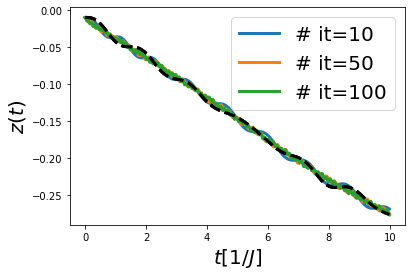

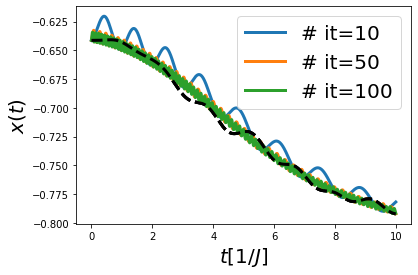

In [69]:
for it in iteration:
    plt.plot(time[:-1],z[it][1,:-1,0],label=f'# it={it}',linewidth=3,alpha=1)
    plt.plot(time[:-1],z_qutip[it][1,:-1,0],linestyle='--',color='black',linewidth=3)
plt.legend(fontsize=20)
plt.xlabel(r'$t[1/J]$',fontsize=20)
plt.ylabel(r'$z(t)$',fontsize=20)
plt.show()

for it in iteration:
    plt.plot(time[:-1],x[it][1,:-1,0],label=f'# it={it}',linewidth=3,alpha=1)
    plt.plot(time[:-1],x_qutip[it][1,:-1,0],linestyle='--',color='black',linewidth=3)
plt.legend(fontsize=20)
plt.xlabel(r'$t[1/J]$',fontsize=20)
plt.ylabel(r'$x(t)$',fontsize=20)
plt.show()

#### Crank Nicolson vs Matrix Exponentiation

In [76]:
labels=['cn','exp']

z={}
x={}
z_qutip={}
x_qutip={}
h={}
data=np.load(f'data/kohm_sham_approach/results/tddft_adiabatic_approximation_uniform_0.0_2.0_steps_1000_self_consistent_steps_50_ndata_10_rate_3.0.npz')


h[labels[0]]=data['potential']

z[labels[0]]=data['z']
x[labels[0]]=data['x']
z_qutip[labels[0]]=data['z_qutip']
x_qutip[labels[0]]=data['x_qutip']
time=np.linspace(0,10,x[labels[0]].shape[1])

data=np.load(f'data/kohm_sham_approach/results/tddft_adiabatic_approximation_uniform_0.0_2.0_steps_1000_self_consistent_steps_50_ndata_10_rate_3.0_exp_True.npz')


h[labels[1]]=data['potential']

z[labels[1]]=data['z']
x[labels[1]]=data['x']
z_qutip[labels[1]]=data['z_qutip']
x_qutip[labels[1]]=data['x_qutip']


Visualization

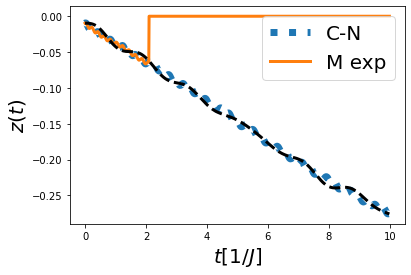

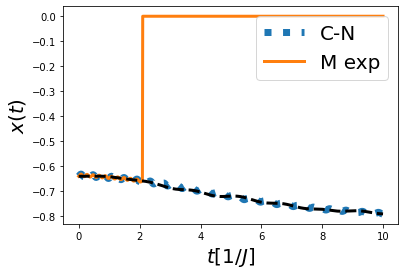

In [77]:
plt.plot(time[:-1],z['cn'][1,:-1,0],label=f'C-N',linewidth=7,alpha=1,linestyle=':')
plt.plot(time[:-1],z['exp'][1,:-1,0],label=f'M exp',linewidth=3,alpha=1)

plt.plot(time[:-1],z_qutip['cn'][1,:-1,0],linestyle='--',color='black',linewidth=3)
plt.legend(fontsize=20)
plt.xlabel(r'$t[1/J]$',fontsize=20)
plt.ylabel(r'$z(t)$',fontsize=20)
plt.show()


plt.plot(time[:-1],x['cn'][1,:-1,0],label=f'C-N',linewidth=7,alpha=1,linestyle=':')
plt.plot(time[:-1],x['exp'][1,:-1,0],label=f'M exp',linewidth=3,alpha=1)

plt.plot(time[:-1],x_qutip['cn'][1,:-1,0],linestyle='--',color='black',linewidth=3)
plt.legend(fontsize=20)
plt.xlabel(r'$t[1/J]$',fontsize=20)
plt.ylabel(r'$x(t)$',fontsize=20)
plt.show()

#### Comparison of the results at different time steps

In [80]:
labels=[0.001,0.01]

z={}
x={}
z_qutip={}
x_qutip={}
h={}
data=np.load(f'data/kohm_sham_approach/results/tddft_adiabatic_approximation_uniform_0.0_2.0_steps_10000_self_consistent_steps_10_ndata_10_rate_3.0_exp_False.npz')


h[labels[0]]=data['potential']

z[labels[0]]=data['z']
x[labels[0]]=data['x']
z_qutip[labels[0]]=data['z_qutip']
x_qutip[labels[0]]=data['x_qutip']
time_1=np.linspace(0,10,x[labels[0]].shape[1])

data=np.load(f'data/kohm_sham_approach/results/tddft_adiabatic_approximation_uniform_0.0_2.0_steps_1000_self_consistent_steps_10_ndata_10_rate_3.0.npz')


h[labels[1]]=data['potential']

z[labels[1]]=data['z']
x[labels[1]]=data['x']
z_qutip[labels[1]]=data['z_qutip']
x_qutip[labels[1]]=data['x_qutip']
time_2=np.linspace(0,10,x[labels[1]].shape[1])


Visualization

In [ ]:
plt.plot(time_1[:-1],z[0.001][1,:-1,0],label=r'$dt=0.001[1/J]$',linewidth=7,alpha=1,linestyle=':')
plt.plot(time_2[:-1],z[0.01][1,:-1,0],label=r'$dt=0.01[1/J]$',linewidth=3,alpha=1)

plt.plot(time_2[:-1],z_qutip[0.01][1,:-1,0],linestyle='--',color='black',linewidth=3)
plt.legend(fontsize=20)
plt.xlabel(r'$t[1/J]$',fontsize=20)
plt.ylabel(r'$z(t)$',fontsize=20)
plt.show()


plt.plot(time_1[:-1],x[0.001][1,:-1,0],label=r'$dt=0.001[1/J]$',linewidth=7,alpha=1,linestyle=':')
plt.plot(time_2[:-1],x[0.01][1,:-1,0],label=r'$dt=0.01[1/J]$',linewidth=3,alpha=1)

plt.plot(time_2[:-1],x_qutip[0.01][1,:-1,0],linestyle='--',color='black',linewidth=3)
plt.legend(fontsize=20)
plt.xlabel(r'$t[1/J]$',fontsize=20)
plt.ylabel(r'$x(t)$',fontsize=20)
plt.show()

## Analysis of the Oscillation

Import

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from src.training.models_adiabatic import Energy_XXZX



Data

In [3]:
data=np.load('data/kohm_sham_approach/results/tddft_adiabatic_approximation_uniform_0.0_2.0_steps_1000_self_consistent_steps_1_ndata_10_rate_0.2_exp_True.npz')


model = torch.load(
    "model_rep/kohm_sham/disorder/model_zzxz_reduction_2_input_channel_dataset_h_0.0-2.0_omega_0.0-2.0_j_1_1nn_n_500k_unet_l_train_8_[40, 40, 40, 40, 40, 40]_hc_5_ks_1_ps_6_nconv_0_nblock",
    map_location="cpu",
)
model.eval()
energy=Energy_XXZX(model=model)

h=data['potential']
engx=data['energy_x']
engz=data['energy_z']
eng=data['energy']
eng_qutip=data['energy_qutip']

z=data['z']
x=data['x']
z_qutip=data['z_qutip']
x_qutip=data['x_qutip']
grad=data['gradient']
time=np.linspace(0,10,x.shape[1])

Energy Computation from time evolution

In [4]:
x_torch_qutip=torch.from_numpy(x_qutip).unsqueeze(-2)
#x=torch.ones_like(torch.from_numpy(x_qutip)).unsqueeze(-2)
z_torch_qutip=torch.from_numpy(z_qutip).unsqueeze(-2)
m_torch_qutip=torch.cat((z_torch_qutip,x_torch_qutip),dim=-2)


x_torch=torch.from_numpy(x).unsqueeze(-2)
#x=torch.ones_like(torch.from_numpy(x_qutip)).unsqueeze(-2)
z_torch=torch.from_numpy(z).unsqueeze(-2)

m_torch=torch.cat((z_torch,x_torch),dim=-2)

eng_qutip=np.zeros_like(engx)
eng=np.zeros_like(engx)
for i in range(10):
    eng_t_qutip=energy(m_torch_qutip[i],torch.from_numpy(h[i]))
    eng_t=energy(m_torch[i],torch.from_numpy(h[i]))
    
    eng_qutip[i]=eng_t_qutip.detach().numpy()
    eng[i]=eng_t.detach().numpy()
    

## Visualization

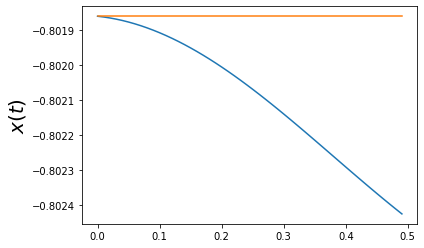

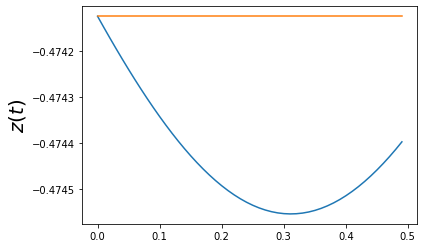

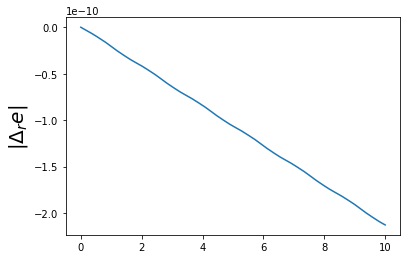

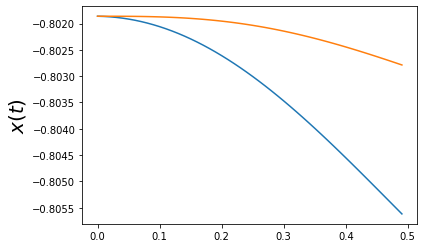

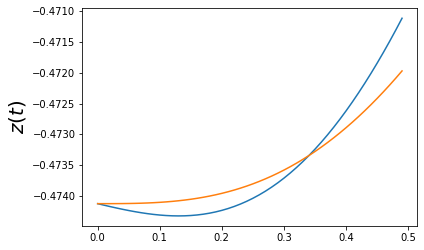

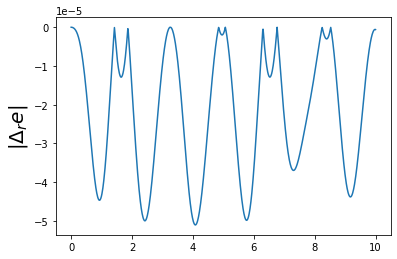

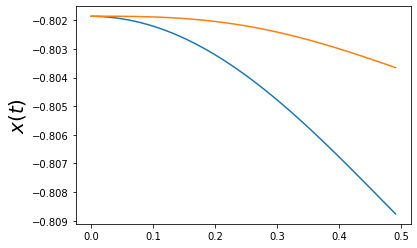

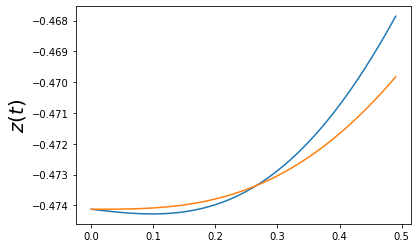

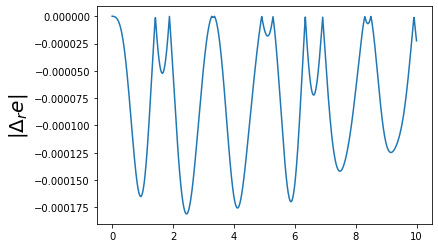

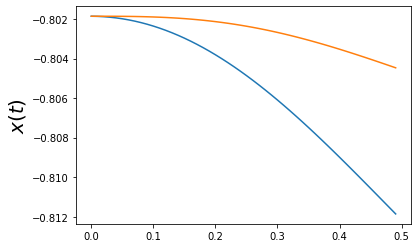

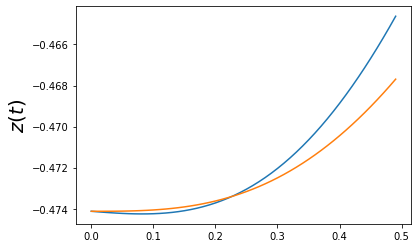

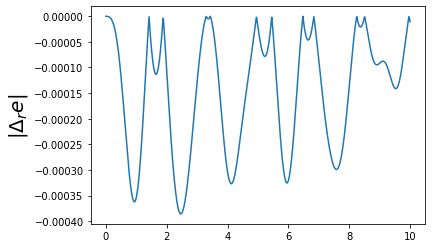

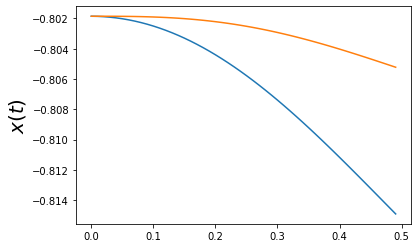

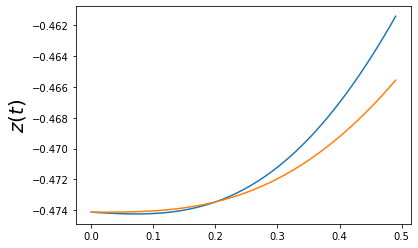

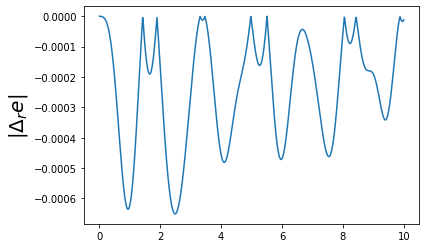

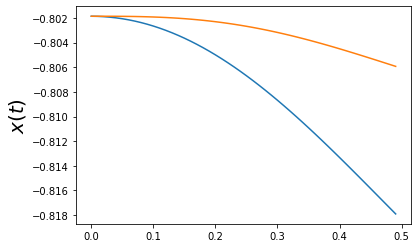

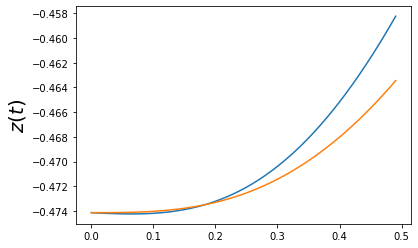

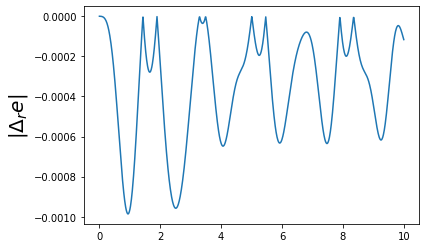

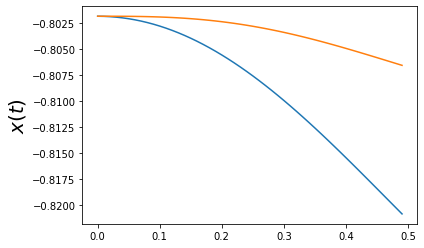

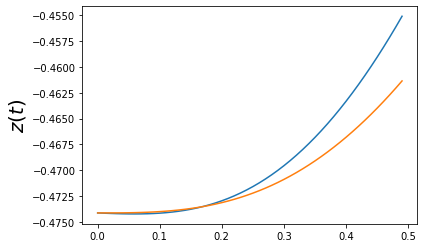

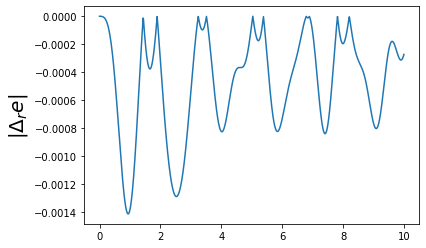

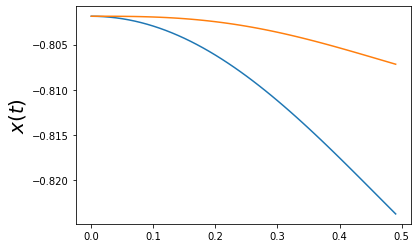

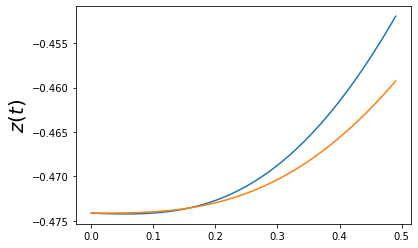

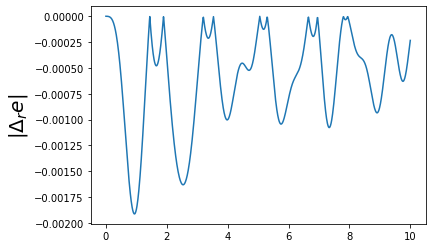

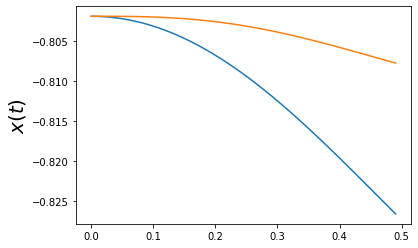

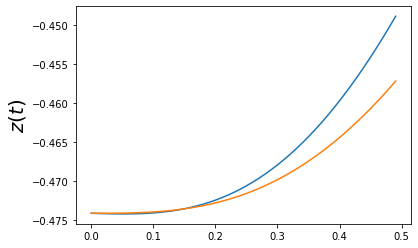

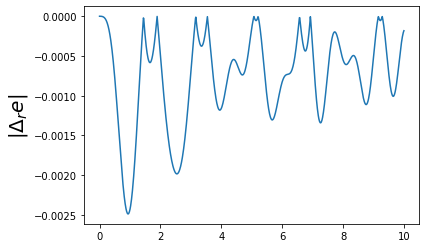

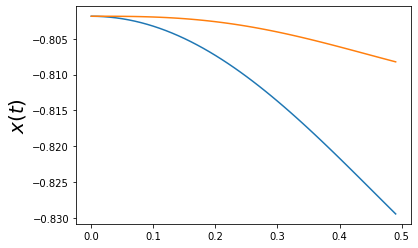

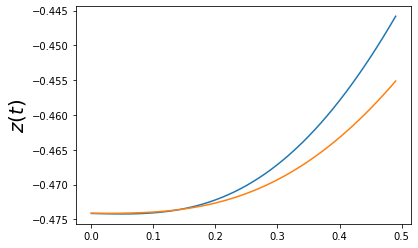

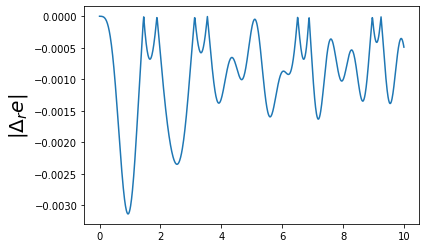

In [7]:
for i in range(10):
    plt.plot(time[:50],m_torch.detach().numpy()[i,:50,1,0])
    plt.plot(time[:50],m_torch_qutip.detach().numpy()[i,:50,1,0])
    plt.ylabel(r'$x(t)$',fontsize=20)
    plt.show()
    plt.plot(time[:50],m_torch.detach().numpy()[i,:50,0,0])
    plt.plot(time[:50],m_torch_qutip.detach().numpy()[i,:50,0,0])
    plt.ylabel(r'$z(t)$',fontsize=20)
    plt.show()
    #plt.plot(time,eng_qutip[i])
    #plt.plot(time,eng[i])
    plt.plot(time,np.abs(eng_qutip[i]-eng[i])/eng[i])
    plt.ylabel(r'$|\Delta_r e|$',fontsize=20)
    plt.show()